# Plotting a fractal to get more practice with numpy

Kind of inspired by p-adic numbers.

In [1]:
import numpy as np
np.set_printoptions(linewidth=120)
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import sys
sys.path.append('..')
import utils.utils as utils
from pathlib import Path

# Saving figures
OUTPUTPATH = Path('./output/')
DATAPATH = Path('./data/')

# Colors
PLOTLY_BLUE, PLOTLY_RED = ['#636EFA', '#EF553B']
blue, red = PLOTLY_BLUE, PLOTLY_RED

pd.options.plotting.backend = "plotly"

def darkmode() -> bool:
    return False if int(utils.get_timestamp(date=False).split('-')[0]) <= 18 else True
def dark_or_light() -> str:
    return 'plotly_dark' if darkmode() else 'plotly'
def black_or_white() -> str:
    return 'white' if darkmode() else 'black'

# Global variable to control saving of figures
global save
save = False
def toggle_save() -> bool:
    global save
    save = not save
    print(f'Saving figures is now {"ON" if save else "OFF"}')
    return save
def set_save(setting: bool) -> bool:
    global save
    save = setting
    print(f'Saving figures is now {"ON" if save else "OFF"}')
    return save
def save_is_on():
    global save
    return save

plotly_config = {
    'displaylogo': False,
    'scrollZoom': True,
    'toImageButtonOptions': {
        'format': 'png', # one of png, svg, jpeg, webp
        'filename': 'custom_image',
        #'height': 500,
        #'width': 700,
        'scale':2 # Multiply title/legend/axis/canvas sizes by this factor
    }
}

In [2]:
lo = dict(
    xaxis_scaleanchor='y',
    xaxis_scaleratio=1,
    width=500,
    height=500,
    template=dark_or_light(),
    showlegend=False,
)

In [3]:
p = 5
N = 6
R = 1
num_points = ((np.ones(N) * p) ** np.arange(N)).sum()
tau = np.pi*2
d0 = np.tile(np.array([[0,0]]),(p,1))
d1 = np.array([[
    [np.cos(i * (alpha:=tau/p)), parent[0]],
    [np.sin(i *  alpha),         parent[1]]
] for i, parent in enumerate(d0)]) * R
d1

array([[[ 1.        ,  0.        ],
        [ 0.        ,  0.        ]],

       [[ 0.30901699,  0.        ],
        [ 0.95105652,  0.        ]],

       [[-0.80901699,  0.        ],
        [ 0.58778525,  0.        ]],

       [[-0.80901699,  0.        ],
        [-0.58778525,  0.        ]],

       [[ 0.30901699,  0.        ],
        [-0.95105652,  0.        ]]])

In [4]:
np.linspace(1,-1,10+1)

array([ 1. ,  0.8,  0.6,  0.4,  0.2,  0. , -0.2, -0.4, -0.6, -0.8, -1. ])

In [5]:
# x**2 + y**2 = 1; y = + - sqrt(1-x**2)
def circle(x_center=0, y_center=0, radius=1, N=314):
    x_half = np.linspace(radius, -radius, N+1)
    y_half = np.sqrt(radius**2 - x_half**2)
    x_circle = x_center + np.concatenate([x_half, np.flip(x_half)])
    y_circle = y_center + np.concatenate([y_half, -y_half])
    return x_circle, y_circle

In [6]:
r = np.sin(tau/p / 2)
#r1 = np.cumsum((r)**np.arange(1,N))[-1]


In [7]:
x_circle, y_circle = circle(1,0,r)
x_circle2, y_circle2 = circle(d1[1,0,0],d1[1,1,0],r)
fig = go.Figure(
    data=[
        go.Scatter(
            x=d1[:,0,0], y=d1[:,1,0],
            mode='markers',
            showlegend=False,
        ),
        go.Scatter(
            x=d1[:,0,0]*r+d1[0,0,0], y=d1[:,1,0]*r+d1[0,1,0],
            mode='markers',
            showlegend=False,
        ),
        go.Scatter(
            x=d1[:,0,0]*r+d1[1,0,0], y=d1[:,1,0]*r+d1[1,1,0],
            mode='markers',
            showlegend=False,
        ),
        go.Scatter(
            y=y_circle,
            x=x_circle,
            showlegend=False,
        ),
        go.Scatter(
            y=y_circle2,
            x=x_circle2,
            showlegend=False,
        ),
    ],
    layout=lo,
)
fig.show(config=plotly_config)

In [8]:
d0 = np.zeros([2,p])

alpha = np.arange(0, tau, tau/p)
d1 = np.array([np.cos(alpha), np.sin(alpha)])

spacers = np.empty_like(d0)
spacers.fill(np.nan)

d01 = np.empty((2,p*3))
d01[:,0::3] = d0
d01[:,1::3] = d1
d01[:,2::3] = spacers
d01
px.line(x=d01[0],y=d01[1]).update_layout(lo)

In [9]:
d0 = np.zeros([2,p])

alpha = np.arange(0, tau, tau/p)
d1 = np.array([np.cos(alpha), np.sin(alpha)])

spacers = np.empty_like(d0)
spacers.fill(np.nan)

d01 = np.empty((2,p*3))
d01[:,0::3] = d0
d01[:,1::3] = d1
d01[:,2::3] = spacers
dt = d01 * r
fig = go.Figure(
    data=[
        go.Scatter(x=d01[0],y=d01[1], mode='lines'),
        go.Scatter(x=dt[0],y=dt[1], mode='lines'),
    ],
    layout=lo,
)
fig.show(config=plotly_config)

In [10]:
# x, y values of nodes representing digit n (dn * p**n)

# parent node (at origin, p copies)
d0 = np.zeros((2,p))

# p child nodes, equally spaced on the unit circle
alpha = np.arange(0, tau, tau/p)
d1 = np.array([np.cos(alpha), np.sin(alpha)])

# spacers for plotting only actual edges
spacers = np.empty_like(d0)
spacers.fill(np.nan)

# Combining d0 and d1 
d01 = np.empty((2,p*3))
d01[:,0::3] = d0
d01[:,1::3] = d1
d01[:,2::3] = spacers

# shrink so that next set of nodes don't overlap
dlm = d01 * r
# copy p times, and shift each differently by d1 values
dlm = np.tile(dlm,(p,1,1)) + np.tile(d1.T.reshape(5,2,1), (1,1,15))
dlm = np.concatenate(np.split(dlm,5), axis=2).squeeze()

In [56]:
#mat = lo | {'width':1000}
#mshow = lambda dt: px.imshow(dt).update_layout(mat).update_layout(coloraxis_cmax=2,coloraxis_cmin=-2)
#mshow(d01)
#np.tile(d01 * r, (p,1,1))
#d1
#np.tile(d1, (p,1,1))
np.swapaxes(np.tile(d1, (p*3,1,1)), 2,0)
#d1.T.reshape(p,2,1)
#np.tile(d1.T.reshape(p,2,1), (1,1,p*3))
#np.tile(d01 * r, (p,1,1)) + np.tile(d1.T.reshape(p,2,1), (1,1,15))
#np.split(d2, 5)
#np.concatenate(np.split(d2, 5), axis=2)
#np.concatenate(np.split(d2, 5), axis=2).squeeze()

array([[[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
          1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ,  0.        ]],

       [[ 0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699,
          0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699,  0.30901699],
        [ 0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652,
          0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652,  0.95105652]],

       [[-0.80901699, -0.80901699, -0.80901699, -0.80901699, -0.80901699, -0.80901699, -0.80901699, -0.80901699,
         -0.80901699, -0.80

In [12]:
#np.arange(1,5**1+1)
#np.arange(1,5**1+1).reshape(5)
#np.arange(1,5**1+1).reshape(5).T
#np.arange(1,5**1+1).reshape((1,5))
#np.arange(1,5**1+1).reshape(5,1)
#np.arange(1,5**2+1).reshape(5,5)
#np.arange(1,5**3+1).reshape(5,5,5)
#np.arange(1,5**4+1).reshape(5,5,5,5)

In [13]:

fig = go.Figure(
    data=[
        go.Scatter(x=d01[0],y=d01[1], mode='lines'),
        go.Scatter(x=dt[0],y=dt[1], mode='lines'),
        go.Scatter(x=dlm[0],y=dlm[1], mode='lines'),
    ],
    layout=lo,
)
fig.show(config=plotly_config)

In [ ]:
# parameters
p = 5
N = 6
R = 1
num_points = ((np.ones(N) * p) ** np.arange(N)).sum()
tau = np.pi*2

# x, y values of nodes representing digit n (dn * p**n)

# parent node (at origin, p copies)
d0 = np.zeros((2,p))

# p child nodes, equally spaced on the unit circle
alpha = np.arange(0, tau, tau/p)
d1 = np.array([np.cos(alpha), np.sin(alpha)])

# spacers for plotting only actual edges
spacers = np.empty_like(d0)
spacers.fill(np.nan)

# Combining d0 and d1 
d01 = np.empty((2,p*3))
d01[:,0::3] = d0
d01[:,1::3] = d1
d01[:,2::3] = spacers

# shrink so that next set of nodes don't overlap
dlm = d01 * r
# copy p times, and translate each copy by a different d1 value
dlm = np.tile(dlm,(p,1,1)) + np.tile(d1.T.reshape(p,2,1), (1,1,p*3))
# split into 5 arrays and join them row-wise, to get 2 large rows
# and remove unnecessary dimensions size 1
dlm = np.concatenate(np.split(dlm,p), axis=2).squeeze()

In [71]:
def make_p_fractal(p: int = 5, N: int = 6, R: int = 1):
    if (num_points := np.sum((np.ones(N) * p) ** np.arange(N))) > (max_points := 10000):
        print(f'Requested number of points is {num_points}, this is larger than the allowed maximum {max_points}.')
        return

# x, y values of nodes representing digit n (dn * p**n)

# parent node (at origin, p copies)
dk = np.zeros((2,p))

# p child nodes, equally spaced on the unit circle
alpha_p = np.arange(0, tau, alpha := tau/p)
r = np.sin(alpha / 2)
dl = np.array([np.cos(alpha_p), np.sin(alpha_p)]) * R

# spacers for plotting only actual edges between nodes
spacers = np.empty_like(dk)
spacers.fill(np.nan)

# Combining d0 and d1 
dkl = np.empty((2,p*3))
dkl[:,0::3] = dk
dkl[:,1::3] = dl
dkl[:,2::3] = spacers

# prepare final array for all points
    

# copy (broadcasting) while shrinking so that next set of nodes don't overlap
dlm = dkl * (r ** np.arange(N)).reshape(N,1,1)
# copy p times, and translate each copy by a different d1 value
#dlm = np.tile(dlm,(p,1,1,1)) + np.tile(dl.T.reshape(p,2,1), (1,1,p*3))
dlm = dlm + dl.reshape(1,1,2,5)
# split into 5 arrays and join them row-wise, to get 2 large rows
# and remove unnecessary dimensions size 1
#dlm = np.concatenate(np.split(dlm,p), axis=2).squeeze()

ValueError: operands could not be broadcast together with shapes (6,2,15) (1,1,2,5) 

In [88]:
dlm = dkl * (r ** np.arange(N)).reshape(N,1,1)
np.expand_dims(
    dl, (0,1)
    )

array([[[[ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699],
         [ 0.        ,  0.95105652,  0.58778525, -0.58778525, -0.95105652]]]])

In [85]:
import sympy as sp
from sympy import Matrix as M

In [86]:
sp.init_printing()

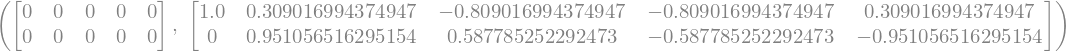

In [87]:
M(dk), M(dl)